In [9]:
import casadi as ca
import numpy as np

In [10]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import time
from IPython.display import HTML
from IPython.display import clear_output

In [11]:
x = ca.SX.sym("x")
y = ca.SX.sym("y")
Q = ca.SX.sym("Q",4,1)
Qa = ca.SX.sym("Q",4,1)
U = ca.SX.sym("U",2,1)
Ua = ca.SX.sym("U",2,1)
A = ca.SX.sym('A',2,2)
# f = x*y.T
# print(x*y,x@y, sep = " \n-----------------------------\n")

# print(ca.hessian(x.T@A@x,x))

In [12]:
f = ca.Function('f',[x,y],[x,ca.sin(y)*x],['x','y'],['r','q'])
print(f(x=1,y=2))
ca.inv(ca.SX([[2,0],[0,1]]))

{'q': DM(0.909297), 'r': DM(1)}


SX(
[[0.5, 00], 
 [00, 1]])

In [148]:
m1 = 1
m2 = 1
l1 = 1
l2 = 1
lc1 = l1/2
lc2= l2/2
I1 = m1*l1**2/12
I2 = m2*l2**2/12
g=9.81

In [6]:
q1=Q[0,0]
q5=Q[1,0]
q2=Q[2,0]
q6=Q[3,0]
q3=Q[4,0]
q4=Q[5,0]


#     U = np.array([[0],[0]])
#     print(q1ddot.shape)
M_mat = ca.vertcat(ca.horzcat(I1 + I2 + m2*l1**2 + 2*m2*l1*lc2*q6, I2 + m2*l1*lc2*q6),ca.horzcat(I2 + m2*l1*lc2*q6, I2))
C_mat = ca.vertcat(ca.horzcat(-2*m2*l1*lc2*q2*q4, -m2*l1*lc2*q2*q4),ca.horzcat(m2*l1*lc2*q2*q3, 0))
Tor_mat = ca.vertcat(ca.horzcat(-m1*g*lc1*q1 - m2*g*(l1*q1 + lc2*(q1*q6+q5*q2))),ca.horzcat(-m2*g*lc2*(q1*q6+q5*q2)))
#     U = (M_mat @ q1ddot).reshape(q1ddot.shape) + C_mat @ Q[2:,0,None] - Tor_mat
#     print(U.shape)
dot_mat = ca.inv(M_mat) @ (Tor_mat + U - C_mat @ ca.vertcat(q3,q4))
# print(ca.vertcat(q3,q4).shape)
Qdot = ca.vertcat(q5*q3,-q1*q3,q6*q4,-q2*q4,dot_mat[0,0], dot_mat[1,0])
# dot_mat = dot_mat.flatten()
f = ca.Function('f', [Q,U], [Qdot])

RuntimeError: .../casadi/core/slice.cpp:83: Assertion "stop<=len" failed:
Slice (start=4, stop=5, step=1) out of bounds with supplied length of 4

In [149]:
q1=Q[0,0]
q2=Q[1,0]
q3=Q[2,0]
q4=Q[3,0]


#     U = np.array([[0],[0]])
#     print(q1ddot.shape)
M_mat = ca.vertcat(ca.horzcat(I1 + I2 + m2*l1**2 + 2*m2*l1*lc2*ca.cos(q2), I2 + m2*l1*lc2*ca.cos(q2)),ca.horzcat(I2 + m2*l1*lc2*ca.cos(q2), I2))
C_mat = ca.vertcat(ca.horzcat(-2*m2*l1*lc2*ca.sin(q2)*q4, -m2*l1*lc2*ca.sin(q2)*q4),ca.horzcat(m2*l1*lc2*ca.sin(q2)*q3, 0))
Tor_mat = ca.vertcat(ca.horzcat(-m1*g*lc1*ca.sin(q1) - m2*g*(l1*ca.sin(q1) + lc2*ca.sin(q1+q2))),ca.horzcat(-m2*g*lc2*ca.sin(q1+q2)))
#     U = (M_mat @ q1ddot).reshape(q1ddot.shape) + C_mat @ Q[2:,0,None] - Tor_mat
#     print(U.shape)
dot_mat = ca.inv(M_mat) @ (Tor_mat + U - C_mat @ ca.vertcat(q3,q4))
# print(ca.vertcat(q3,q4).shape)
Qdot = ca.vertcat(q3,q4,dot_mat[0,0], dot_mat[1,0])
# dot_mat = dot_mat.flatten()
f = ca.Function('f', [Q,U], [Qdot])

In [ ]:
# Qdot_sol= f(ca.SX([1,1,1,1,1,1]),ca.SX([1,1]))
# # sum(Qdot_sol**2)
# # ca.vertcat(Qdot_sol.T,Q)
# opti = ca.Opti()
# xs = opti.variable(int(Q0.shape[0]/8*6),1)
# Us = opti.variable(int(Q0.shape[0]/8*2),1)

# f(xs[0:6],Us[0:2])[5]

In [ ]:
from math import *
del_t = 0.1
tf = 2;
# q_init = np.block([[np.linspace(-pi/2,pi/2,tf/del_t)],[np.zeros((1,tf/del_t))],[],[]])
q10=pi/2
q20=0;
q0 = np.array([[q10)],[cos(q10)],[sin(q20)],[cos(q20)],[0],[0]]);
qf1=-pi/2
qf2= 0
qf =  np.array([[sin(qf1)],[cos(qf1)],[sin(qf2)],[cos(qf2)],[0],[0]]);
Q01 = np.block([[q0[0,0] + (qf[0,0]-q0[0,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[1,0] + (qf[1,0]-q0[1,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[2,0] + (qf[2,0]-q0[2,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[3,0] + (qf[3,0]-q0[3,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[4,0] + (qf[4,0]-q0[4,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[5,0] + (qf[5,0]-q0[5,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)]])
Q02 = np.block([[1*np.arange(0,(tf+del_t/2),(del_t/2))],[1*np.arange(0,(tf+del_t/2),del_t/2)]])
m = Q02.flatten().shape[0];
Q0 = np.append(Q01.flatten(),Q02.flatten()).flatten()
xs=ca.SX.sym('xs',6,1)
Us=ca.SX.sym('Us',6,1)
umin = -10000
umax = 10000
sol=0

In [170]:
from math import *

tf = 2;
del_t = tf/10;
q01 = pi/2;
q02 = 0;
qf1 = -pi/2;
qf2 = 0;
qdot1des = 1;
qdot2des = -1;
restrict = 1;

if qdot1des!=0:
    while np.sign(qf1-q01)!=np.sign(qdot1des):
        qf1 = qf1 + np.sign(qdot1des)*2*pi;
if qdot2des!=0:
    while np.sign(qf2-q02)!=np.sign(qdot2des):
        qf2 = qf2 + np.sign(qdot2des)*2*pi;
# q_init = np.block([[np.linspace(-pi/2,pi/2,tf/del_t)],[np.zeros((1,tf/del_t))],[],[]])
q0 = np.array([[q01],[q02],[0],[0]]);
qf = np.array([[qf1],[qf2],[0],[0]]);
Q01 = np.block([[q0[0,0] + (qf[0,0]-q0[0,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[1,0] + (qf[1,0]-q0[1,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[2,0] + (qf[2,0]-q0[2,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)],[q0[3,0] + (qf[3,0]-q0[3,0])*np.arange(0,tf+del_t/2,del_t/2)/(tf)]])
Q01 = Q01[:,0:int(round((tf+del_t/2)/del_t*2))]
Q02 = np.array([[0*np.arange(0,tf+del_t,del_t/2)],[0*np.arange(0,tf+del_t,del_t/2)]])
Q02 = Q02[:,0,0:int(round((tf+del_t/2)/del_t*2))]
m = Q02.flatten().shape[0];
Q0 = np.append(Q01.flatten(),Q02.flatten()).flatten()
umin = -10000
umax = 10000
print(qf)
print(Q01.shape)
# np.arange(0,tf + del_t/2,del_t/2)[0:int((tf+del_t/2)/del_t*2)]
# int((tf+del_t/2)/del_t*2)# np.arange(0,tf+del_t/2,del_t/2)

[[ 4.71238898]
 [-6.28318531]
 [ 0.        ]
 [ 0.        ]]
(4, 21)


In [ ]:
opti = ca.Opti()
# print(Q0.shape[0]/8*6,1)
xs = opti.variable(int(Q0.shape[0]/8*6),1)
Us = opti.variable(int(Q0.shape[0]/8*2),1)
# print(Us.shape)
opti.minimize(Us.T@Us)
opti.subject_to((xs[0:6] - q0).T @ (xs[0:6] - q0) ==0)
opti.subject_to((xs[-6:] - qf).T @ (xs[-6:] - qf) ==0)
for i in range(0,m,2):
    opti.subject_to(Us[i:i+2,0].T @ Us[i:i+2,0] <= umax**2)
for i in range(Q0.shape[0]-m-9):
    if i%12 == 0:
        if i!=0 and i!=Q0.shape[0]-m-12:
            opti.subject_to(xs[i,0]**2 + xs[i+1,0]**2-1==0)#0.99999)
#             opti.subject_to(xs[i,0]**2 + xs[i+1,0]**2-1<=1.000001)
            opti.subject_to(xs[i+2,0]**2 + xs[i+3,0]**2-1==0)#>=0.99999)
#             opti.subject_to(xs[i+2,0]**2 + xs[i+3,0]**2-1<=1.00001)
            opti.subject_to(xs[i+6,0]**2 + xs[i+1+6,0]**2-1==0)#>=0.99999)
#             opti.subject_to(xs[i+6,0]**2 + xs[i+1+6,0]**2-1<=1.00001)
            opti.subject_to(xs[i+6+2,0]**2 + xs[i+6+3,0]**2-1==0)#>=0.99999)
#             opti.subject_to(xs[i+6+2,0]**2 + xs[i+6+3,0]**2-1<=1.00001)
        a=i;
        b=int(i/6*2)
        if a<Q0.shape[0]-m-18:
            interpol_array = 0.5*(xs[a:a+6,0] + xs[a+12:a+12+6,0]) + del_t/8.0*(f(xs[a:a+6,0],Us[b:b+2,0]) - f(xs[a+12:a+12+6,0],Us[b+4:b+4+2,0])) - xs[a+6:a+6+6,0]
            collocation_array = (xs[a:a+6,0] - xs[a+12:a+12+6,0]) + del_t/6.0*(f(xs[a:a+6,0],Us[b:b+2,0]) + f(xs[a+12:a+12+6,0],Us[b+4:b+4+2,0]) +4*f(xs[a+6:a+6+6,0],Us[b+2:b+2+2,0]))
            for j in range(6):
                if j!=1 and j!=5:
                    opti.subject_to(interpol_array[j]==0);
                    opti.subject_to(collocation_array[j]==0);
p_opts = {"expand":True}
s_opts = {"constr_viol_tol" : 0.001}
opti.solver("ipopt",p_opts, s_opts)
opti.set_initial(xs,Q01.flatten())
opti.set_initial(Us,Q02.flatten())
        

In [179]:
opti = ca.Opti()
# print(Q0.shape[0]/8*6,1)
xs = opti.variable(int(Q0.shape[0]/6*4),1)
Us = opti.variable(int(Q0.shape[0]/6*2),1)
Q_x = np.array([[1000.,0,0,0],[0,1000.,0,0],[0,0,10.,0],[0,0,0,10.0]])
R_u = np.eye(Us.shape[0])
# print(Us.shape)
sum=0
for i in range(Us.shape[0]-5):
    if i%4==0:
        sum = sum+del_t/6.0*(Us[i:i+2,0].T @ Us[i:i+2,0] + 4*Us[i+2:i+2+2,0].T @ Us[i+2:i+2+2,0] + Us[i+4:i+4+2,0].T @ Us[i+4:i+4+2,0])
J = ca.Function('J',[Us],[sum])        
opti.minimize(sum) #(xs[-4:,:]-qf).T @ Q_x @ (xs[-4:,:]-qf) +
opti.subject_to((xs[0:4] - q0).T @ (xs[0:4] - q0) ==0)
opti.subject_to((xs[-4:] - qf).T @ (xs[-4:] - qf) ==0)
for i in range(0,m,2):
    opti.subject_to(Us[i:i+2,0].T @ Us[i:i+2,0] <= umax**2)
for i in range(xs.shape[0]):
    if i%4==0:
#         opti.subject_to(xs[i]<=pi+0.1)
#         opti.subject_to(xs[i]>=-pi)
#         opti.subject_to(xs[i+1]<=pi)
#         opti.subject_to(xs[i+1]>=-pi)
#         opti.subject_to(xs[i+2]<=pi)
#         opti.subject_to(xs[i+2]>=-pi)
#         opti.subject_to(xs[i+3]<=pi)
#         opti.subject_to(xs[i+3]>=-pi)
        if qdot1des:
            opti.subject_to(qdot1des*xs[i+2]>=0)
        if qdot2des:
            if i!=int((xs.shape[0]-4)) and i!=0:
                opti.subject_to(qdot2des*xs[i+3]>=0.001)
        elif restrict:
            opti.subject_to(restrict*xs[i+3]>=0)
#         opti.subject_to(Us[int(i/4*2)]==0)
    if i%8 == 0:
        a=i;
        b=int(i/4*2)
        if a<=xs.shape[0]-12:
            interpol_array = 0.5*(xs[a:a+4,0] + xs[a+8:a+8+4,0]) + del_t/8.0*(f(xs[a:a+4,0],Us[b:b+2,0]) - f(xs[a+8:a+8+4,0],Us[b+4:b+4+2,0])) - xs[a+4:a+4+4,0]
            collocation_array = (xs[a:a+4,0] - xs[a+8:a+8+4,0]) + del_t/6.0*(f(xs[a:a+4,0],Us[b:b+2,0]) + f(xs[a+8:a+8+4,0],Us[b+4:b+4+2,0]) +4*f(xs[a+4:a+4+4,0],Us[b+2:b+2+2,0]))
            for j in range(interpol_array.shape[0]):
                opti.subject_to(interpol_array[j,0]==0);
                opti.subject_to(collocation_array[j,0]==0);
# p_opts = {"expand":True}
s_opts = {"max_iter" : 50000, "constr_viol_tol" : 0.000001}
opti.solver("ipopt",{}, s_opts)
opti.set_initial(xs,Q01.flatten())
opti.set_initial(Us,Q02.flatten())
        

In [180]:
clear_output()
sol=0
sol =opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      828
Number of nonzeros in inequality constraint Jacobian.:       82
Number of nonzeros in Lagrangian Hessian.............:      252

Total number of variables............................:      126
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       82
Total number of inequality constraints...............:       61
        inequality constraints with only lower bounds:       40
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       21

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [181]:
if sol:
    Q_sol = sol.value(xs)
    Q_sol = Q_sol.reshape(int(Q_sol.shape[0]/4),4)
else:
    Q_sol = opti.debug.value(xs)
    Q_sol = Q_sol.reshape(int(Q_sol.shape[0]/4),4)
a = int((sol.value(xs).shape[0]-12)/8)*8
xs = sol.value(xs).reshape(xs.shape[0],1)
Us = sol.value(Us).reshape(Us.shape[0],1)
print(sol)
print(J(Us))
print(xs.reshape(int(xs.shape[0]/4),4))
print(Us.reshape(int(Us.shape[0]/2),2))

# file = open("2f.txt","w")
# file.write(str(sol))
# file.write("\n" + str(J(Us)))
# file.close()

# xs = sol.value(xs)
# # xs.shape[0]
# interpolarr = 0.5*(xs[a:a+4,0] + xs[a+8:a+8+4,0]) + del_t/8.0*(f(xs[a:a+4,0],Us[b:b+2,0]) - f(xs[a+8:a+8+4,0],Us[b+4:b+4+2,0])) - xs[a+4:a+4+4,0]
# interpolarr
# # collocation_array = (xs[a:a+4,0] - xs[a+8:a+8+4,0]) + del_t/6.0*(f(xs[a:a+4,0],Us[b:b+2,0]) + f(xs[a+8:a+8+4,0],Us[b+4:b+4+2,0]) +4*f(xs[a+4:a+4+4,0],Us[b+2:b+2+2,0]))
# # collocation_array
# # a
xs[a+8:a+12,0]
a+12

Opti {
  instance #34
  #variables: 2 (nx = 126)
  #parameters: 0 (np = 0)
  #constraints: 143 (ng = 143)
  CasADi solver allocated.
  CasADi solver was called: Solve_Succeeded
}
127.31
[[ 1.57079632e+00  4.30155976e-08  8.48308068e-08  2.35460488e-08]
 [ 1.57079633e+00 -1.35267541e-02 -9.89025715e-09 -3.74464698e-01]
 [ 1.57079632e+00 -9.56786431e-02 -9.73430586e-09 -1.37250182e+00]
 [ 1.56324420e+00 -1.42959967e-01 -9.89267912e-09 -1.63056994e+00]
 [ 1.60100480e+00 -8.33281688e-01  9.06254289e-01 -1.42333098e+01]
 [ 1.86151311e+00 -2.34686375e+00  3.90354851e+00 -1.38080374e+01]
 [ 2.30164183e+00 -3.14883033e+00  4.49866272e+00 -9.99990105e-04]
 [ 2.64986052e+00 -3.15495982e+00  2.61836090e+00 -9.14424153e-02]
 [ 2.85584400e+00 -3.16108932e+00  1.65395880e+00 -9.99990122e-04]
 [ 2.98516783e+00 -3.16118932e+00  9.82888497e-01 -9.99995261e-04]
 [ 3.06249585e+00 -3.16128931e+00  6.14042630e-01 -9.99990125e-04]
 [ 3.11507044e+00 -3.16138931e+00  4.72450429e-01 -9.99993815e-04]
 [ 3.16398

84

In [ ]:
def animate(i):
    global t, tf , q, u,del_t,l1,l2,Q_star,tlast,j
    if t[-1]<=tf and j<Q_sol.shape[0]:
        ax = plt.gca();
        ax.clear();
#         q1ddot = 2*np.array([[-pi/2-q[0,0]],[0-q[1,0]]]) + 6*np.array([[-q[2,0]],[-q[3,0]]])
#         q = state_transition(q,q1ddot,0.01)
        q = Q_sol[j,0:6].reshape(6,1)
#         plt.clear()
        ax.plot([0,l1*q[0,0],l1*q[0,0]+l2*(q[0,0]*q[3,0] + q[1,0]*q[2,0])],[0,-l1*q[1,0],-l1*q[1,0] -l2*(q[1,0]*q[3,0] - q[0,0]*q[2,0])],'-k',linewidth=2)
        ax.set_xlim([0-l1-l2,0+l1+l2])
        ax.set_ylim([0-l1-l2,0+l1+l2])
        t=np.append(t,t[-1]+del_t/2);
        j=j+1
        if t[-1]>=int(tlast)+2:
            tlast = int(t[-1])
            print(int(t[-1]), end=' ')
    else:
        pass

In [182]:
def animate(i):
    global t, tf , q, u,del_t,l1,l2,Q_star,tlast,j
    if j<Q_sol.shape[0]:
        ax = plt.gca();
        ax.clear();
#         q1ddot = 2*np.array([[-pi/2-q[0,0]],[0-q[1,0]]]) + 6*np.array([[-q[2,0]],[-q[3,0]]])
#         q = state_transition(q,q1ddot,0.01)
        q = Q_sol[j,0:4].reshape(4,1)
#         plt.clear()
        ax.plot([0,l1*sin(q[0,0]),l1*sin(q[0,0])+l2*sin(q[0,0] + q[1,0])],[0,-l1*cos(q[0,0]),-l1*cos(q[0,0]) -l2*cos(q[0,0] + q[1,0])],'-k',linewidth=4)
        ax.set_xlim([0-l1-l2,0+l1+l2])
        ax.set_ylim([0-l1-l2,0+l1+l2])
        t=np.append(t,t[-1]+del_t/2);
        j=j+1
        if t[-1]>=int(tlast)+2:
            tlast = int(t[-1])
            print(int(t[-1]), end=' ')
    else:
        pass

0 2 

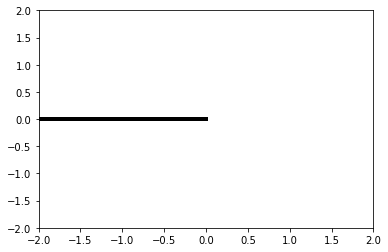

In [183]:
fig = plt.figure()
t=np.array([0]);
j=0
tlast=-2
q = np.zeros((4,1));
ani = animation.FuncAnimation(fig, animate, frames = Q_sol.shape[0]+5, interval=del_t/2*1000)
HTML(ani.to_html5_video())
# print(j)
# Q_sol

In [ ]:
sol

In [ ]:
from casadi import *

In [ ]:
x = MX.sym('x',2); # Two states

# Expression for ODE right-hand side
z = 1-x[1]**2
rhs = vertcat(z*x[0]-x[1],x[0])

ode = {}         # ODE declaration
ode['x']   = x   # states
ode['ode'] = rhs # right-hand side

# Construct a Function that integrates over 4s
F = integrator('F','cvodes',ode,{'tf':4})

# Start from x=[0;1]
res = F(x0=[0,1])

print(res["xf"])

# Sensitivity wrt initial state
res = F(x0=x)
S = Function('S',[x],[jacobian(res["xf"],x)])
print(S([0,1]))

In [ ]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

# Degree of interpolating polynomial
d = 3

# Get collocation points
tau_root = np.append(0, ca.collocation_points(d, 'legendre'))

# Coefficients of the collocation equation
C = np.zeros((d+1,d+1))

# Coefficients of the continuity equation
D = np.zeros(d+1)

# Coefficients of the quadrature function
B = np.zeros(d+1)

# Construct polynomial basis
for j in range(d+1):
    # Construct Lagrange polynomials to get the polynomial basis at the collocation point
    p = np.poly1d([1])
    for r in range(d+1):
        if r != j:
            p *= np.poly1d([1, -tau_root[r]]) / (tau_root[j]-tau_root[r])

    # Evaluate the polynomial at the final time to get the coefficients of the continuity equation
    D[j] = p(1.0)

    # Evaluate the time derivative of the polynomial at all collocation points to get the coefficients of the continuity equation
    pder = np.polyder(p)
    for r in range(d+1):
        C[j,r] = pder(tau_root[r])

    # Evaluate the integral of the polynomial to get the coefficients of the quadrature function
    pint = np.polyint(p)
    B[j] = pint(1.0)

# Time horizon
T = 10.

# Declare model variables
x1 = ca.SX.sym('x1')
x2 = ca.SX.sym('x2')
x = ca.vertcat(x1, x2)
u = ca.SX.sym('u')

# Model equations
xdot = ca.vertcat((1-x2**2)*x1 - x2 + u, x1)

# Objective term
L = x1**2 + x2**2 + u**2

# Continuous time dynamics
f = ca.Function('f', [x, u], [xdot, L], ['x', 'u'], ['xdot', 'L'])

# Control discretization
N = 20 # number of control intervals
h = T/N

# Start with an empty NLP
w=[]
w0 = []
lbw = []
ubw = []
J = 0
g=[]
lbg = []
ubg = []

# For plotting x and u given w
x_plot = []
u_plot = []

# "Lift" initial conditions
Xk = ca.MX.sym('X0', 2)
w.append(Xk)
lbw.append([0, 1])
ubw.append([0, 1])
w0.append([0, 1])
x_plot.append(Xk)

# Formulate the NLP
for k in range(N):
    # New NLP variable for the control
    Uk = ca.MX.sym('U_' + str(k))
    w.append(Uk)
    lbw.append([-1])
    ubw.append([1])
    w0.append([0])
    u_plot.append(Uk)

    # State at collocation points
    Xc = []
    for j in range(d):
        Xkj = ca.MX.sym('X_'+str(k)+'_'+str(j), 2)
        Xc.append(Xkj)
        w.append(Xkj)
        lbw.append([-0.25, -np.inf])
        ubw.append([np.inf,  np.inf])
        w0.append([0, 0])

    # Loop over collocation points
    Xk_end = D[0]*Xk
    for j in range(1,d+1):
       # Expression for the state derivative at the collocation point
       xp = C[0,j]*Xk
       for r in range(d): xp = xp + C[r+1,j]*Xc[r]

       # Append collocation equations
       fj, qj = f(Xc[j-1],Uk)
       g.append(h*fj - xp)
       lbg.append([0, 0])
       ubg.append([0, 0])

       # Add contribution to the end state
       Xk_end = Xk_end + D[j]*Xc[j-1];

       # Add contribution to quadrature function
       J = J + B[j]*qj*h

    # New NLP variable for state at end of interval
    Xk = ca.MX.sym('X_' + str(k+1), 2)
    w.append(Xk)
    lbw.append([-0.25, -np.inf])
    ubw.append([np.inf,  np.inf])
    w0.append([0, 0])
    x_plot.append(Xk)

    # Add equality constraint
    g.append(Xk_end-Xk)
    lbg.append([0, 0])
    ubg.append([0, 0])

# Concatenate vectors
w = ca.vertcat(*w)
g = ca.vertcat(*g)
x_plot = ca.horzcat(*x_plot)
u_plot = ca.horzcat(*u_plot)
w0 = np.concatenate(w0)
lbw = np.concatenate(lbw)
ubw = np.concatenate(ubw)
lbg = np.concatenate(lbg)
ubg = np.concatenate(ubg)

# Create an NLP solver
prob = {'f': J, 'x': w, 'g': g}
solver = ca.nlpsol('solver', 'ipopt', prob);

# Function to get x and u trajectories from w
trajectories = ca.Function('trajectories', [w], [x_plot, u_plot], ['w'], ['x', 'u'])

# Solve the NLP
sol = solver(x0=w0, lbx=lbw, ubx=ubw, lbg=lbg, ubg=ubg)
x_opt, u_opt = trajectories(sol['x'])
x_opt = x_opt.full() # to numpy array
u_opt = u_opt.full() # to numpy array

# Plot the result
tgrid = np.linspace(0, T, N+1)
plt.figure(1)
plt.clf()
plt.plot(tgrid, x_opt[0], '--')
plt.plot(tgrid, x_opt[1], '-')
plt.step(tgrid, np.append(np.nan, u_opt[0]), '-.')
plt.xlabel('t')
plt.legend(['x1','x2','u'])
plt.grid()
plt.show()